# PyTorch Warmup

In [ ]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np

## Part A: Function Definition and Gradients

In [ ]:
def f(x, y, z):
    """Define a non-linear function f(x,y,z) = x^2*y + y*sin(z) + z^3"""
    return x**2*y + y*torch.sin(z) + z**3

#### 1. Compute function value

In [ ]:
# Define torch tensors for x=2, y=3, z=4
x = torch.tensor([2.])
y = torch.tensor([3.])
z = torch.tensor([1.])

In [ ]:
result = f(x, y, z)
print(f"1. Function value at point ({x.item()}, {y.item()}, {z.item()}):")
print(f"   f({x.item()}, {y.item()}, {z.item()}) = {result.item():.4f}")
print(f"   Expected: {4*3 + 3*np.sin(1) + 1:.4f}\n")

1. Function value at point (2.0, 3.0, 1.0):
   f(2.0, 3.0, 1.0) = 15.5244
   Expected: 15.5244



#### 2. Compute gradients

In [ ]:
# Define torch tensors for x=5, y=3.2, z=7 with requires_grad
x = torch.tensor([5.], requires_grad=True)
y = torch.tensor([3.2], requires_grad=True)
z = torch.tensor([7.], requires_grad=True)

In [ ]:
# Compute gradients
result = f(x, y, z)
result.backward()

print("2. Gradients at this point:")
print(f"   ∂f/∂x = {x.grad.item():.4f} Expected: 32.0000")
print(f"   ∂f/∂y = {y.grad.item():.4f} Expected: 25.6570")
print(f"   ∂f/∂z = {z.grad.item():.4f} Expected: 149.4125")
print()


2. Gradients at this point:
   ∂f/∂x = 32.0000 Expected: 32.0000
   ∂f/∂y = 25.6570 Expected: 25.6570
   ∂f/∂z = 149.4125 Expected: 149.4125



## Part B: Learning to Approximate f(x,y,z) with Neural Networks

In [ ]:
import torch.nn as nn

#### 1. Generate training data

In [ ]:
def generate_data(n_samples=1000, seed=42):
    """Generate random input points and compute target values using our function f"""
    # Set seed for reproducibility
    torch.manual_seed(seed)

    # Generate random inputs
    X = torch.rand(n_samples, 3) * 4 - 2  # Values between -2 and 2

    # Compute target values using our function f
    x, y, z = X[:, 0], X[:, 1], X[:, 2]
    y_true = x**2 * y + y * torch.sin(z) + z**3

    return X, y_true.reshape(-1, 1)

# Generate training data
X_train, y_train = generate_data(1000)
X_test, y_test = generate_data(200)

#### 2. Define and initialize the neural network

In [ ]:
# Initialize model (simple NN with right inout output sizes) , loss function, and optimizer
def create_model():
    model = nn.Sequential(nn.Linear(3, 1))
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    return model, criterion, optimizer

In [ ]:
# Compute initial predictions and loss
model, criterion, optimizer = create_model()
with torch.no_grad():
    y_pred = model(X_train)
    initial_loss = criterion(y_pred, y_train)

print("\nInitial Model Test:")
print(f"Initial MSE Loss: {initial_loss.item():.4f}")


Initial Model Test:
Initial MSE Loss: 16.0948


#### 3. Training Loop

In [ ]:
# 1. complete forward
# 2. complete Backward pass and optimization

def train_model(model, optimizer, X_train, y_train, X_test, y_test,
                epochs=10, batch_size=32, print_every=2):
    """Train the model and return training history"""
    train_losses = []
    test_losses = []

    n_batches = len(X_train) // batch_size

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        # Mini-batch training
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size

            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            # Forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            epoch_loss += loss.item()

        # Compute training and test losses
        model.eval()
        with torch.no_grad():
            train_loss = criterion(model(X_train), y_train).item()
            test_loss = criterion(model(X_test), y_test).item()

            train_losses.append(train_loss)
            test_losses.append(test_loss)

        if (epoch + 1) % print_every == 0:
            print(f"Epoch [{epoch+1}/{epochs}]")
            print(f"Training Loss: {train_loss:.4f}")
            print(f"Test Loss: {test_loss:.4f}\n")

    return train_losses, test_losses


Training the Model:
Epoch [2/10]
Training Loss: 10.9844
Test Loss: 11.6075

Epoch [4/10]
Training Loss: 7.9053
Test Loss: 8.3500

Epoch [6/10]
Training Loss: 6.0407
Test Loss: 6.3944

Epoch [8/10]
Training Loss: 4.9238
Test Loss: 5.2297

Epoch [10/10]
Training Loss: 4.2874
Test Loss: 4.5670



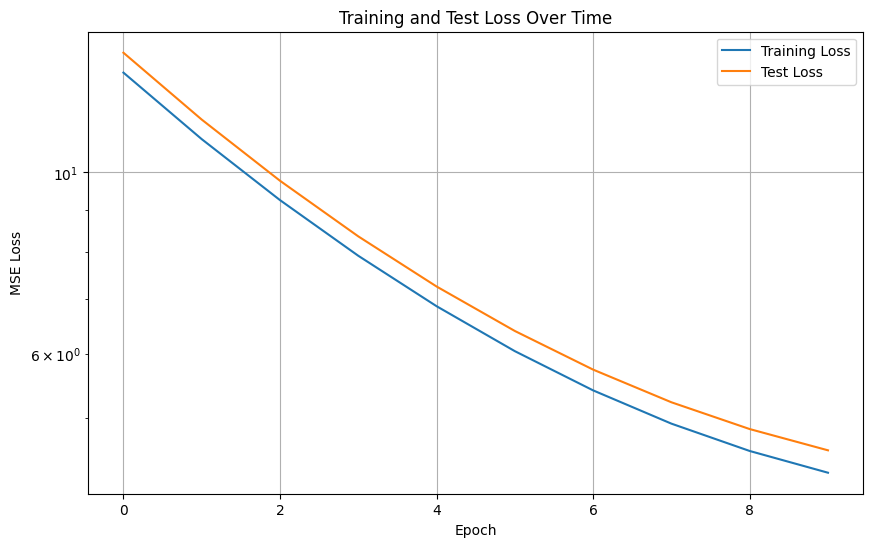

In [ ]:

# Train the model
print("\nTraining the Model:")
train_losses, test_losses = train_model(model, optimizer, X_train, y_train, X_test, y_test)

# Visualize training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

#### 4. Improve your model and training
- Test different layers/neurons model size
- Test different batch sizes / epochs
- Test different learning rate

In [ ]:
model = nn.Sequential(nn.Linear(3, 32),
                      nn.ReLU(),
                      nn.Linear(32, 32),
                      nn.ReLU(),
                      nn.Linear(32, 1))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch [2/14]
Training Loss: 0.0240
Test Loss: 0.0199

Epoch [4/14]
Training Loss: 0.0276
Test Loss: 0.0262

Epoch [6/14]
Training Loss: 0.0222
Test Loss: 0.0215

Epoch [8/14]
Training Loss: 0.0186
Test Loss: 0.0181

Epoch [10/14]
Training Loss: 0.0179
Test Loss: 0.0158

Epoch [12/14]
Training Loss: 0.0180
Test Loss: 0.0150

Epoch [14/14]
Training Loss: 0.0203
Test Loss: 0.0170



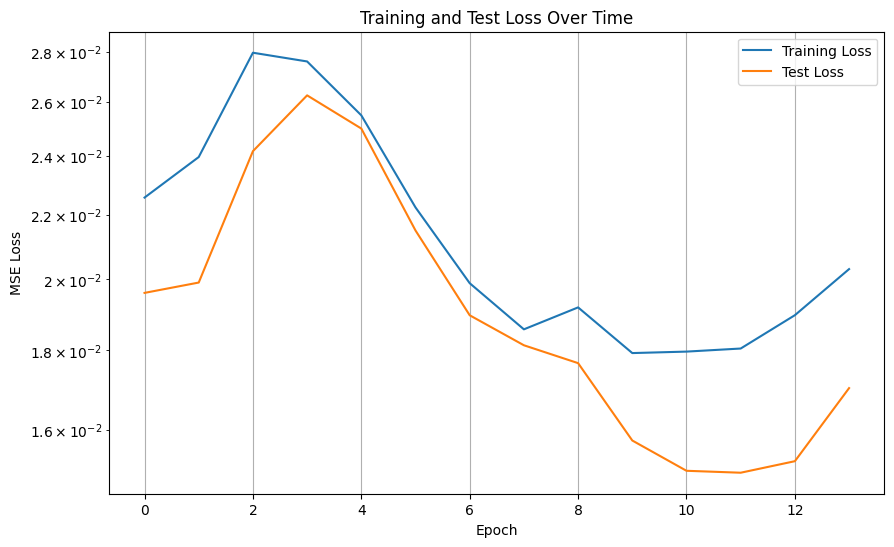

In [ ]:
train_losses, test_losses = train_model(model, optimizer, X_train, y_train, X_test, y_test, epochs=14, batch_size=32)

# Visualize training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

## Part C: Train with checkpoint

In [ ]:
# 1. Add checkpoint save logic in train_model
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(), # It can be useful to keep the optimizer state to preserve information such as momentum.
    # Add any other training metrics you want to preserve
}
torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
# 2. Restart your notebook kernel, then load the checkpoint to resume training

checkpoint = torch.load('checkpoint.pth')

def create_model():
    model = nn.Sequential(nn.Linear(3, 1))
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    return model, criterion, optimizer

model, criterion, optimizer = create_model() # Recreate the model and optimizer

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
train_model(model, optimizer, X_train, y_train, X_test, y_test)

<ipython-input-16-18377581d64a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoint.pth')


RuntimeError: Error(s) in loading state_dict for Sequential:
	Unexpected key(s) in state_dict: "2.weight", "2.bias", "4.weight", "4.bias". 
	size mismatch for 0.weight: copying a param with shape torch.Size([32, 3]) from checkpoint, the shape in current model is torch.Size([1, 3]).
	size mismatch for 0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([1]).

## Part D: Device Management

In [ ]:
# Import necessary libraries
import torch
import time

# Colab Note:
# To use the GPU in Colab, you need to enable GPU acceleration by:
# 1. Clicking on "Runtime" in the top menu.
# 2. Selecting "Change runtime type".
# 3. Setting "Hardware accelerator" to "GPU".
# This allows your code to access GPU resources.

# Check available devices
print("Available devices:")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
print(f"MPS available: {torch.backends.mps.is_available()}")
print()

# Function to create a large tensor and perform operations with timing
def tensor_operations(device):
    # Start timing
    start_time = time.perf_counter()

    # Create large tensors
    size = 10000
    a = torch.randn(size, size, device=device)
    b = torch.randn(size, size, device=device)

    # Perform operations
    c = torch.matmul(a, b)
    d = torch.sin(c)
    result = d.sum().item()

    # End timing and print duration
    end_time = time.perf_counter()
    print(f"Operations on {device} took {end_time - start_time:.4f} seconds")

    return result

# Test on CPU
print("\nCPU Test:")
result_cpu = tensor_operations('cpu')

# Test on GPU if available
if torch.cuda.is_available():
    print("\nGPU (CUDA) Test:")
    result_gpu = tensor_operations('cuda')
